Saving house_prices_practice.csv to house_prices_practice (1).csv
---- Model Performance Metrics ----
Mean Absolute Error (MAE): 10126.1733
Mean Squared Error (MSE): 144540866.0004
Root Mean Squared Error (RMSE): 12022.5150
R-squared Score (R2): 0.9770 (97.70%)
Mean Absolute Percentage Error (MAPE): 0.0470 (4.70%)

---- Regression Equation Details ----
Intercept (b0): -1555960.9020
               Coefficient
Id                3.695564
OverallQual   12033.078106
GrLivArea        55.247721
GarageCars    19399.549319
TotalBsmtSF      25.489980
YearBuilt       767.411834
FullBath      10746.959166
BedroomAbvGr   4968.399174
LotArea          -0.203670

Mathematical Equation:
SalePrice = -1555960.9020 + (3.6956 * Id) + (12033.0781 * OverallQual) + (55.2477 * GrLivArea) + (19399.5493 * GarageCars) + (25.4900 * TotalBsmtSF) + (767.4118 * YearBuilt) + (10746.9592 * FullBath) + (4968.3992 * BedroomAbvGr) + (-0.2037 * LotArea)


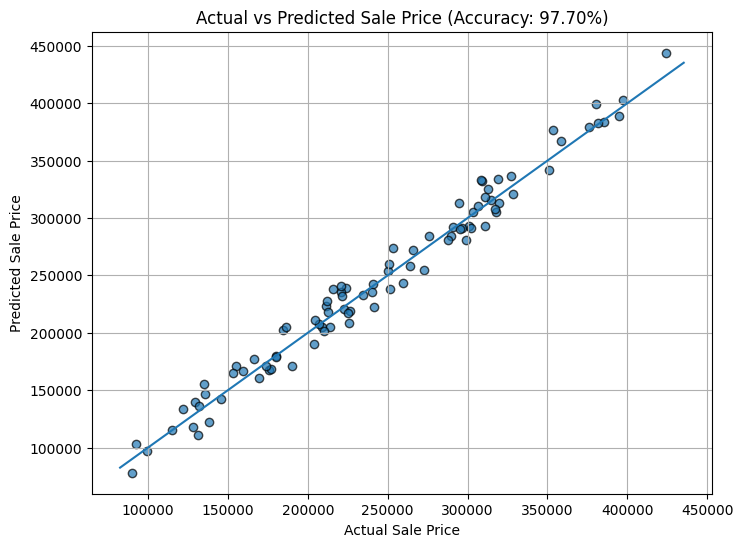

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test))

print("---- Model Performance Metrics ----")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R2): {r2:.4f} ({r2*100:.2f}%)")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} ({mape*100:.2f}%)")

print("\n---- Regression Equation Details ----")
print(f"Intercept (b0): {model.intercept_:.4f}")

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

equation = f"SalePrice = {model.intercept_:.4f}"
for i, col in enumerate(X.columns):
    equation += f" + ({model.coef_[i]:.4f} * {col})"

print("\nMathematical Equation:")
print(equation)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title(f"Actual vs Predicted Sale Price (Accuracy: {r2*100:.2f}%)")
plt.grid(True)
plt.show()


Saving weather_forecast_data.csv to weather_forecast_data.csv
---- Model Performance Metrics ----
Accuracy: 0.9267 (92.67%)
Precision: 0.7324 (73.24%)
Recall: 0.5909 (59.09%)
F1 Score: 0.6541 (65.41%)
TP: 52, TN: 643, FP: 19, FN: 36


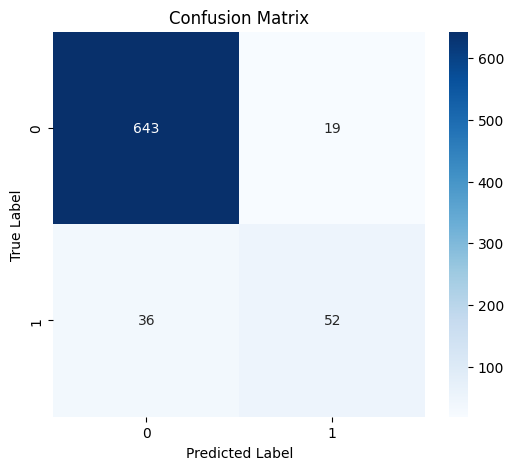

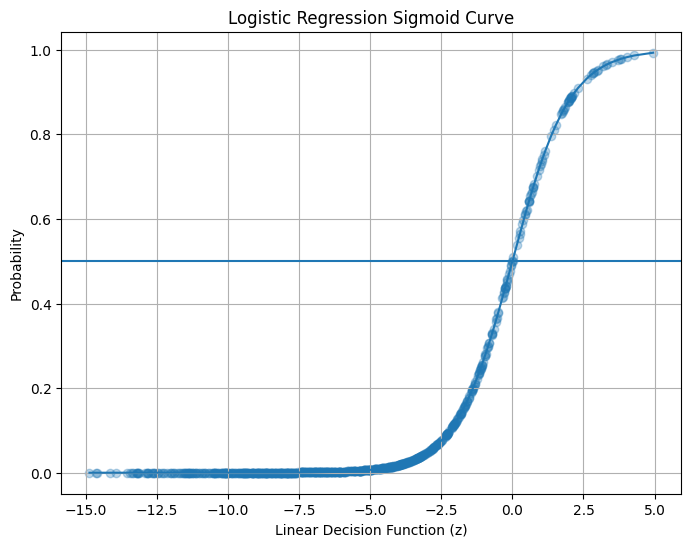

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

target = df.columns[-1]

if df[target].dtype == object:
    df[target] = df[target].astype('category').cat.codes

X = df.drop(target, axis=1)
y = df[target]

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("---- Model Performance Metrics ----")
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print(f"Precision: {prec:.4f} ({prec*100:.2f}%)")
print(f"Recall: {rec:.4f} ({rec*100:.2f}%)")
print(f"F1 Score: {f1:.4f} ({f1*100:.2f}%)")

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

z = model.decision_function(X_test)
prob = model.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))
idx = np.argsort(z)
plt.scatter(z, prob, alpha=0.3)
plt.plot(z[idx], prob[idx])
plt.axhline(0.5)
plt.xlabel("Linear Decision Function (z)")
plt.ylabel("Probability")
plt.title("Logistic Regression Sigmoid Curve")
plt.grid(True)
plt.show()


Saving weather_forecast_data.csv to weather_forecast_data (1).csv
---- Model Performance Metrics ----
Accuracy: 0.9280 (92.80%)
Precision: 0.7500 (75.00%)
Recall: 0.5795 (57.95%)
F1 Score: 0.6538 (65.38%)
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
TP: 51, TN: 645, FP: 17, FN: 37


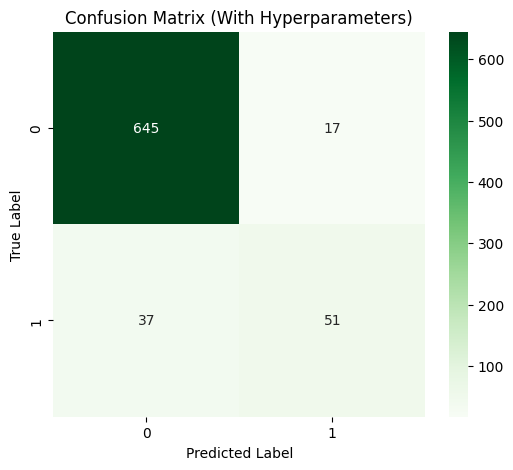

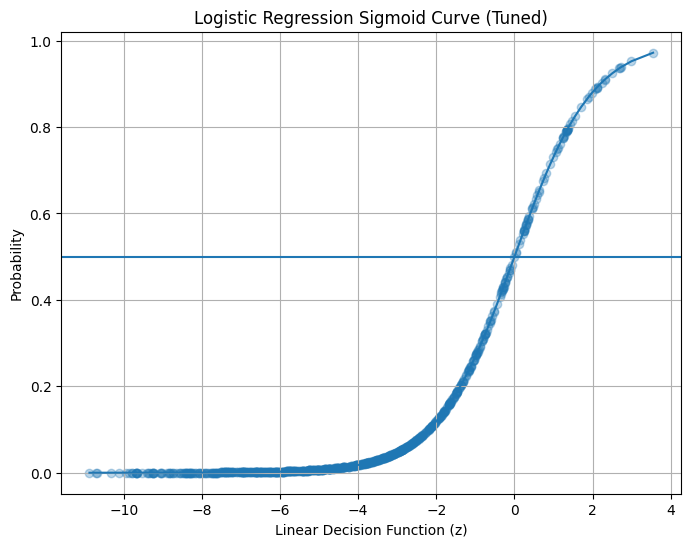

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

target = df.columns[-1]

if df[target].dtype == object:
    df[target] = df[target].astype('category').cat.codes

X = df.drop(target, axis=1)
y = df[target]

X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("---- Model Performance Metrics ----")
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")
print(f"Precision: {prec:.4f} ({prec*100:.2f}%)")
print(f"Recall: {rec:.4f} ({rec*100:.2f}%)")
print(f"F1 Score: {f1:.4f} ({f1*100:.2f}%)")
print("Best Hyperparameters:", grid.best_params_)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (With Hyperparameters)")
plt.show()

z = best_model.decision_function(X_test)
prob = best_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))
idx = np.argsort(z)
plt.scatter(z, prob, alpha=0.3)
plt.plot(z[idx], prob[idx])
plt.axhline(0.5)
plt.xlabel("Linear Decision Function (z)")
plt.ylabel("Probability")
plt.title("Logistic Regression Sigmoid Curve (Tuned)")
plt.grid(True)
plt.show()

